Nama : Muhammad Irpan <br>
NIM : 211351094<br>
Kelas : Malam A


# import Dataset

In [242]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"muhammadirpan","key":"ce1ae312e2b0f62e570b4a3decd81239"}'}

In [243]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [244]:
!kaggle datasets download -d thedevastator/cancer-patients-and-air-pollution-a-new-link/ --force

  0% 0.00/7.36k [00:00<?, ?B/s]
100% 7.36k/7.36k [00:00<00:00, 17.3MB/s]


In [245]:
!mkdir cancer-patients-and-air-pollution-a-new-link
!unzip cancer-patients-and-air-pollution-a-new-link.zip -d cancer-patients-and-air-pollution-a-new-link
!ls cancer-patients-and-air-pollution-a-new-link

Archive:  cancer-patients-and-air-pollution-a-new-link.zip
  inflating: cancer-patients-and-air-pollution-a-new-link/cancer patient data sets.csv  
'cancer patient data sets.csv'


# import library yang digunakan

In [246]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Data Discovery

In [247]:
df = pd.read_csv('cancer-patients-and-air-pollution-a-new-link/cancer patient data sets.csv')

In [248]:
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

# EDA (minimal 5)

<ipython-input-250-4eb784db2dab>:25: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


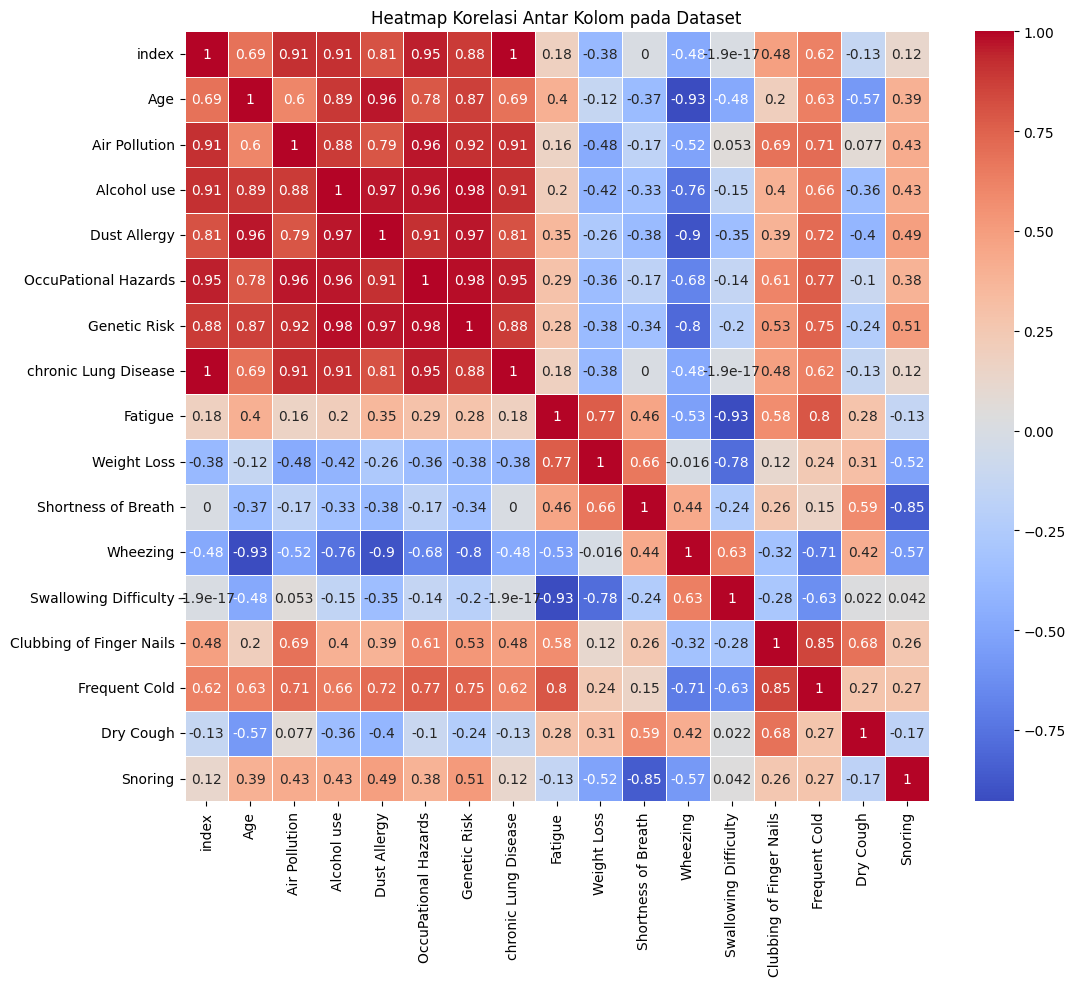

In [250]:
data = {
    'index': [0, 1, 2, 3, 4],
    'Patient Id': ['P1', 'P10', 'P100', 'P1000', 'P101'],
    'Age': [33, 17, 35, 37, 46],
    'Air Pollution': [2, 3, 4, 7, 6],
    'Alcohol use': [4, 3, 5, 7, 8],
    'Dust Allergy': [4, 1, 5, 7, 8],
    'OccuPational Hazards': [5, 5, 6, 7, 7],
    'Genetic Risk': [4, 3, 5, 7, 7],
    'chronic Lung Disease': [3, 4, 5, 6, 7],
    'Fatigue': [3, 1, 8, 4, 3],
    'Weight Loss': [4, 3, 7, 2, 2],
    'Shortness of Breath': [2, 7, 9, 3, 4],
    'Wheezing': [2, 8, 2, 1, 1],
    'Swallowing Difficulty': [3, 6, 1, 4, 4],
    'Clubbing of Finger Nails': [1, 2, 4, 5, 2],
    'Frequent Cold': [2, 1, 6, 6, 4],
    'Dry Cough': [3, 7, 7, 7, 2],
    'Snoring': [4, 2, 2, 5, 3],
    'Level': ['Low', 'Medium', 'High', 'High', 'High']
}

df = pd.DataFrame(data)

correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Korelasi Antar Kolom pada Dataset')
plt.show()

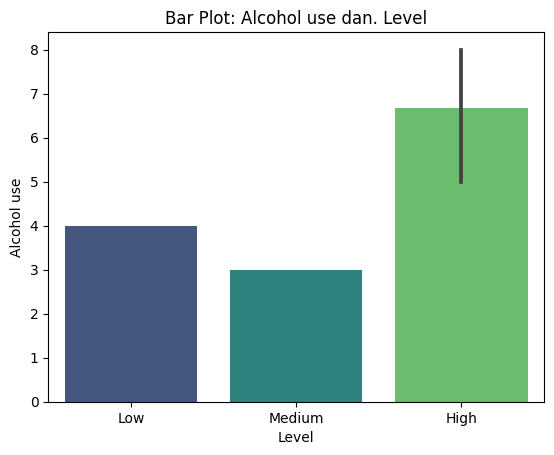

In [251]:
sns.barplot(y='Alcohol use', x='Level', data=df, palette='viridis')
plt.title('Bar Plot: Alcohol use dan. Level')
plt.xlabel('Level')
plt.ylabel('Alcohol use')
plt.show()

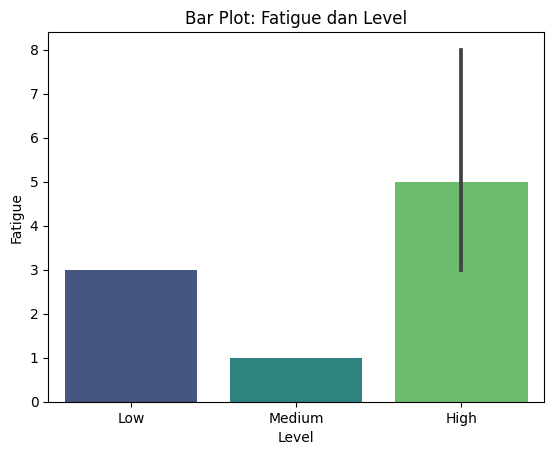

In [252]:
sns.barplot(y='Fatigue', x='Level', data=df, palette='viridis')
plt.title('Bar Plot: Fatigue dan Level')
plt.xlabel('Level')
plt.ylabel('Fatigue')
plt.show()

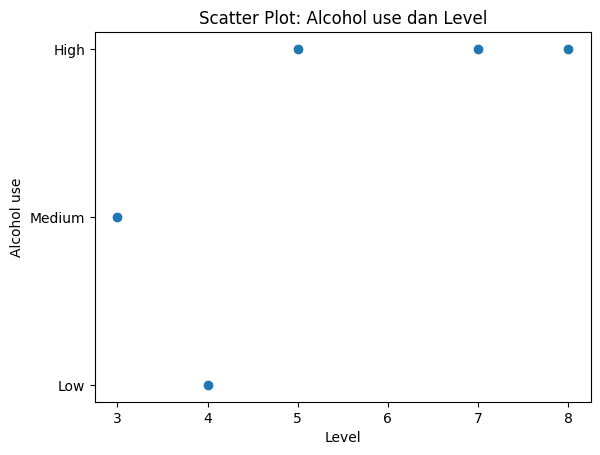

In [253]:
plt.scatter(x='Alcohol use', y='Level', data=df)
plt.title('Scatter Plot: Alcohol use dan Level')
plt.xlabel('Level')
plt.ylabel('Alcohol use')
plt.show()

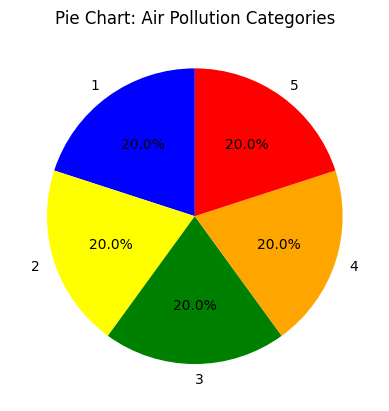

In [254]:
labels = ['1', '2', '3', '4', '5', '6', '7', '8']
colors = ['blue', 'yellow', 'green', 'orange', 'red', 'pink', 'brown', 'grey']

value_counts = df['Air Pollution'].value_counts()

plt.pie(x=value_counts, labels=labels[:len(value_counts)], colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart: Air Pollution Categories')
plt.show()

# Preprocessing

In [255]:
independen = [col for col in df.columns != 'Level']
defenden = 'Level'

In [256]:
# memisahkan numerik dan kategori
numerical = []
catgcols = []

for col in df.columns:
    if df[col].dtype == 'float64':
        numerical.append(col)
    elif df[col].dtype == 'int64':
        numerical.append(col)
    else:
        catgcols.append(col)

for col in df.columns:
    if col in numerical:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

In [257]:
numerical

['index',
 'Age',
 'Air Pollution',
 'Alcohol use',
 'Dust Allergy',
 'OccuPational Hazards',
 'Genetic Risk',
 'chronic Lung Disease',
 'Fatigue',
 'Weight Loss',
 'Shortness of Breath',
 'Wheezing',
 'Swallowing Difficulty',
 'Clubbing of Finger Nails',
 'Frequent Cold',
 'Dry Cough',
 'Snoring']

In [258]:
catgcols

['Patient Id', 'Level']

In [259]:
df['Level'].value_counts()

High      3
Low       1
Medium    1
Name: Level, dtype: int64

In [260]:
le = LabelEncoder()
for col in catgcols:
    df[col] = le.fit_transform(df[col])

In [261]:
df['Level'] = le.fit_transform(df['Level'])

In [262]:
df.head()

,index,Patient Id,Age,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,0,33,2,4,4,5,4,3,3,4,2,2,3,1,2,3,4,1
1,1,1,17,3,3,1,5,3,4,1,3,7,8,6,2,1,7,2,2
2,2,2,35,4,5,5,6,5,5,8,7,9,2,1,4,6,7,2,0
3,3,3,37,7,7,7,7,7,6,4,2,3,1,4,5,6,7,5,0
4,4,4,46,6,8,8,7,7,7,3,2,4,1,4,2,4,2,3,0


In [263]:
df.to_csv('cancer-patients-and-air-pollution-a-new-link/cancer patient data sets.csv')

In [264]:
X = df.drop(columns=['Level', 'index', 'Frequent Cold', 'Snoring'], axis=1)
Y = df['Level']

In [265]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=2)


In [266]:
print(X.shape, x_train.shape, x_test.shape)

(5, 15) (3, 15) (2, 15)


# modeling

In [267]:
model1=KNeighborsClassifier(n_neighbors=3)
model1.fit(x_train,y_train)
y_pred1=model1.predict(x_test)

In [268]:
score = model1.score(x_test, y_test)
print('akurasi model knn = ', score)

akurasi model knn =  1.0


In [269]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



# Visualisasi hasil algoritma

In [270]:
input_data = (1,17,1,3,1,5,3,4,2,2,2,2,4,2,3)
input_data_numpy = np.asarray(input_data)
data_reshaped = input_data_numpy.reshape(1, -1)
prediksi = model1.predict(data_reshaped)
print(prediksi)

if (prediksi[0] == 0):
    print('Keparahan Kanker Paru-Paru Pasien Berada di Tingkat Tinggi')
elif(prediksi == 2):
    print('Keparahan Kanker Paru-Paru Pasien Berada di Tingkat Sedang')
else:
    print('Keparahan Kanker Paru-Paru Pasien Berada di Tingkat Rendah')

[0]
Keparahan Kanker Paru-Paru Pasien Berada di Tingkat Tinggi


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


# save model (pickle)